# Systematisation results

In [20]:
import pandas as pd
import numpy as np
from math import log

import re

import matplotlib.pyplot as plt
import seaborn as sns

% load_ext rpy2.ipython
% matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
## set attributes for plots

# set colours
cat_colours = sns.xkcd_palette(["cerulean", "goldenrod", "red", "grass green"])
chain_colours = sns.color_palette('hls')

# set font
sns.set(font_scale=1.3)

# set linewidth
sns.set_context(rc={"lines.linewidth":1.2})



In [22]:
%%R 

# libraries for running mixed effects models and printing p values
library("lme4")
library("lmerTest")


In [23]:
# function to make printing from R output faster

def print_output(output):
    
    """
    For output transferred from R to python,
    print the output.
    
    """
    
    for line in output:
        
        print line

In [24]:
# read in data files 
ex1 = pd.read_csv("../data_files/ex1.csv")
ex2 = pd.read_csv("../data_files/ex2.csv")
ex3 = pd.read_csv("../data_files/ex3.csv")

In [25]:
# replace binary string values with 1, 0

bin_dict={'y': 1, 'n': 0}

ex1['markerPres'] = ex1['markerPres'].replace(bin_dict)
ex2['markerPres'] = ex2['markerPres'].replace(bin_dict)
ex3['markerPres'] = ex3['markerPres'].replace(bin_dict)

In [26]:
# order in which to present conditions

cols_order = ['Transmission + Interaction', 'Interaction only', 'Transmission only']

## Contents

1. <a href='#marking'>Presence of functional marking</a>
 * <a href='#m-ex1'>Experiment 1</a>
 * <a href='#m-ex2'>Experiment 2</a>
 * <a href='#m-ex3'>Experiment 3</a>
2. <a href='#ent'>Entropy</a>
 * <a href='#ent-func'>Functions to calculate entropy</a>
 * <a href='#ent-ex1'>Experiment 1</a>
 * <a href='#ent-ex2'>Experiment 2</a>
 * <a href='#ent-ex3'>Experiment 3</a>

<a id='marking'></a>

## 1. Presence of functional marking

Functional marking is defined as any marker meaningful to the whole category (person, location, object, action), and not to a particular item. Here we measure the proportion of functional markers across categories in the meaning space, at each generation/round for each chain/pair.

<a id='m-ex1'></a>

### Experiment 1

Plot showing mean proportion of marked gestures over generations, by category.

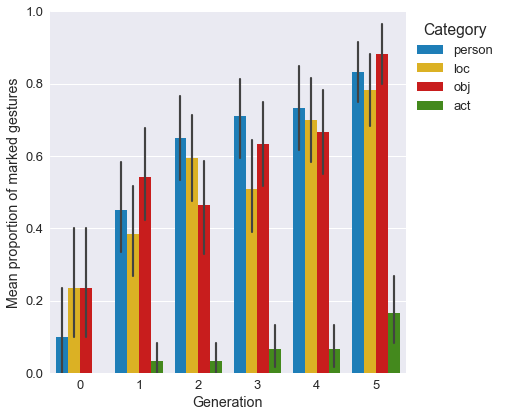

In [27]:
mPres_ex1 = sns.factorplot(x='generation', y='markerPres', hue='ent_type', data=ex1,
                          legend=False, kind='bar', size=6, aspect=1, palette=cat_colours,
                          hue_order=['person', 'loc', 'obj', 'act'])

mPres_ex1.set(ylim=(0,1), xlabel='Generation', ylabel = 'Mean proportion of marked gestures')

plt.legend(title='Category', bbox_to_anchor=(1,1))

Model testing the effect of generation and word category (verb or not-verb) on the presence of functional markers.

**Output variable:**
 * marker presence

**Fixed effects:**
 * generation
 * verb (y or n)
 * generation * verb
 
**Random effects:**

 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested within chains)
 * target (random intercept)

In [28]:
%R -i ex1

In [29]:
%%R

# make sure blank cells are read as NA
ex1$markerPres[ex1$markerPres==""]=NA

# run model as logistic model with bobyqa as optimiser

# full model with interaction term
marking_model_ex1 = glmer(markerPres ~ generation *
                               verb + 
                                 (1 + generation|chain) +
                                 (1|participant:chain)+
                                 (1|target), 
                                  ex1, family='binomial', 
                                  control=glmerControl(optimizer='bobyqa'))



In [30]:
# get model output
ex1_mark_model_out = %R capture.output(summary(marking_model_ex1))

print_output(ex1_mark_model_out)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: markerPres ~ generation * verb + (1 + generation | chain) + (1 |  
    participant:chain) + (1 | target)
   Data: ex1
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1123.5   1170.1   -552.7   1105.5     1305 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4291 -0.4222 -0.1098  0.4411  6.4398 

Random effects:
 Groups            Name        Variance Std.Dev. Corr 
 participant:chain (Intercept) 0.07054  0.2656        
 target            (Intercept) 1.70745  1.3067        
 chain             (Intercept) 0.25554  0.5055        
                   generation  0.03679  0.1918   -0.32
Number of obs: 1314, groups:  participant:chain, 170; target, 24; chain, 5

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.2793     0.4287  -2.984  0.00284 ** 
generation  

The model above demonstrates a significant effect of both generation (increase in marking over generations) and meaning category (verbs are less likely to be marked than non-verbs). We find no significant interaction between generation and word category.

<a id='m-ex2'></a>

### Experiment 2

Plots showing mean proportion of marked gestures over generations, by category for each condition described in experiment 2.

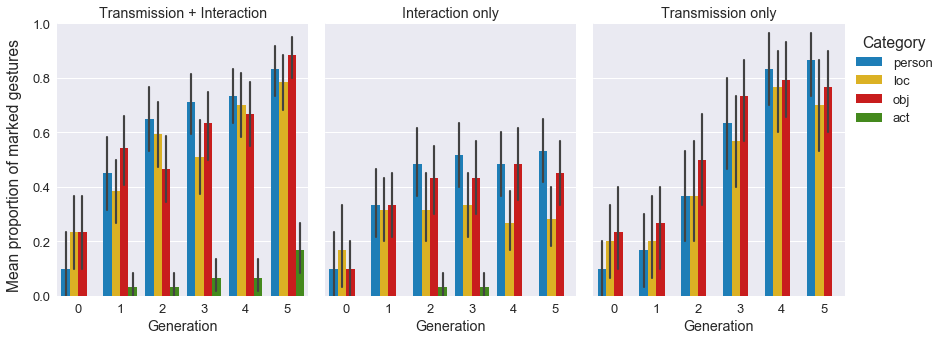

In [31]:
# plot marker presence against generation, with target category as hue, and condition for each plot

mPres_ex2_plot = sns.factorplot(x='generation', y='markerPres', hue='ent_type', data=ex2,
                                col='condition', legend=False,
              kind='bar', size = 5, aspect = 0.8, palette=cat_colours, hue_order =["person", "loc", "obj", "act"],
                                  col_order = cols_order)

mPres_ex2_plot.set(ylim=(0,1), xlabel='Generation', ylabel = '')

mPres_ex2_plot.set_titles('{col_name}' )

plt.legend(title='Category', bbox_to_anchor=(1,1))

plt.text(-14.5,0.9, "Mean proportion of marked gestures", rotation=90)

Model testing the effect of condition, generation and word category (verb or not-verb) on the presence of functional markers.

**Output variable:**
 * marker presence

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**
(same as above)

 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested within chains)
 * target (random intercept)

In [32]:
%R -i ex2

In [33]:
%%R

# combined condition acts as baseline condition
ex2$condition = relevel(ex2$condition, 'Transmission + Interaction')

# make sure blank cells are read as NA
ex2$markerPres[ex2$markerPres==""]=NA

In [34]:
%%R

# run model as logistic model with bobyqa as optimiser

# full model with interaction term
marking_model_ex2 = glmer(markerPres ~ generation * condition + 
                                 (1 + generation|chain) +
                                 (1|participant:chain)+
                                 (1|target), 
                                  ex2, family='binomial', 
                                  control=glmerControl(optimizer='bobyqa'))


In [35]:
# print full model output

ex2_mark_model_output = %R capture.output(summary(marking_model_ex2))

print_output(ex2_mark_model_output)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: markerPres ~ generation * condition + (1 + generation | chain) +  
    (1 | participant:chain) + (1 | target)
   Data: ex2
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2691.3   2758.6  -1334.7   2669.3     3341 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1509 -0.4075 -0.1127  0.4134 11.6606 

Random effects:
 Groups            Name        Variance Std.Dev. Corr 
 participant:chain (Intercept) 0.34555  0.5878        
 target            (Intercept) 5.30617  2.3035        
 chain             (Intercept) 0.08265  0.2875        
                   generation  0.01428  0.1195   -0.30
Number of obs: 3352, groups:  participant:chain, 282; target, 24; chain, 5

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -2.510

The model summary confirms what is shown in the plots. For the combined condition, there is a significant effect of generation, such that marking increases over generations. There is a significant main effect of condition for the individuals, such that individuals have fewer markers in generation 0, but crucially there is no interaction between generation and condition for the individuals - in both the combined condition and the individual condition, we see a cumulative increase in functional marking. There is, however, an interaction between generation and the dyadic condition, such that the marking the dyads does not increase to the extent that it does in the other two conditions.

<a id='m-ex3'></a>

### Experiment 3

Plots showing mean proportion of marked gestures over generations, by category for each condition described in experiment 3.

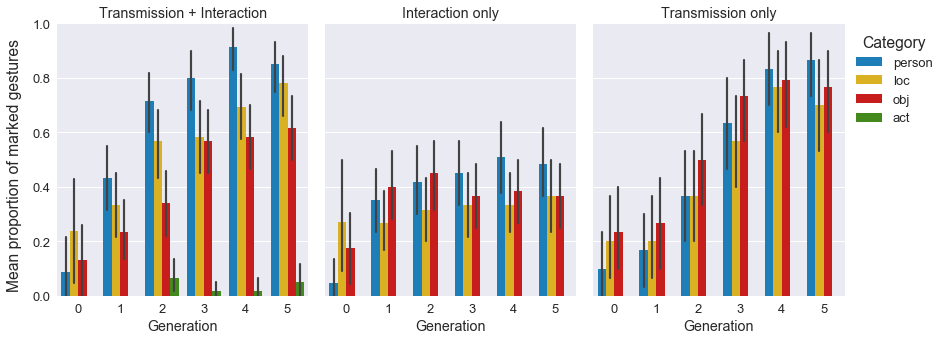

In [36]:
# plot marker presence by condition, generation, category

mPres_ex3_plot = sns.factorplot(x='generation', y='markerPres', hue='ent_type', data=ex3,
                                col='condition', legend=False,
              kind='bar', size = 5, aspect = 0.8, palette=cat_colours, hue_order =["person", "loc", "obj", "act"],
                                 col_order = cols_order)

mPres_ex3_plot.set(ylim=(0,1), xlabel='Generation', ylabel = '')

mPres_ex3_plot.set_titles('{col_name}' )

plt.legend(title='Category', bbox_to_anchor=(1,1))

plt.text(-14.5,0.9, "Mean proportion of marked gestures", rotation=90)

Model testing the effect of condition, generation and word category (verb or not-verb) on the presence of functional markers.

Model structure same as ex2.

**Output variable:**
 * marker presence

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**

 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested within chains)
 * target (random intercept)

The plot above shows the proportion of marking on the functional categories at each generation, for each condition in the rerun data. We see a very similar pattern to the original run data. In the conditions where transmission is present, we see a cumulative increase in the presence of functional markers over generations in all categories, except for verbs which largely remain unmarked. In the dyadic condition, marking stalls, with no category having more than half its items marked, suggesting a lack of widespread systematisation.

In [37]:
%R -i ex3

In [38]:
%%R 

# combined condition as baseline level
ex3$condition = relevel(ex3$condition, "Transmission + Interaction")

# make sure blank cells are read as NA
ex3$markerPres[ex3$markerPres==""]=NA

In [39]:
%%R

# run models as logistic models



# full model with interaction term
marking_model_ex3 = glmer(markerPres ~ generation * condition + 
                                 (1 + generation|chain) +
                                 (1|participant:chain)+
                                 (1|target), 
                                  ex3, family='binomial', 
                                  control=glmerControl(optimizer='bobyqa'))



In [40]:
# print full model output

ex3_mark_model_output = %R capture.output(summary(marking_model_ex3))
print_output(ex3_mark_model_output)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: markerPres ~ generation * condition + (1 + generation | chain) +  
    (1 | participant:chain) + (1 | target)
   Data: ex3
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2624.8   2691.9  -1301.4   2602.8     3283 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8721 -0.4116 -0.0855  0.4138 11.9531 

Random effects:
 Groups            Name        Variance Std.Dev. Corr 
 participant:chain (Intercept) 0.97694  0.9884        
 target            (Intercept) 7.08934  2.6626        
 chain             (Intercept) 0.07144  0.2673        
                   generation  0.01113  0.1055   -1.00
Number of obs: 3294, groups:  participant:chain, 264; target, 24; chain, 5

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -3.222

Again, we see a very similar result to that for experiment 2.For the combined condition, there is a significant effect of generation, such that marking increases over generations. There is no interaction between generation and condition for the individuals - in both the combined condition and the individual condition, we see a cumulative increase in functional marking. There is, however, an interaction between generation and the dyadic condition, such that the marking the dyads does not increase to the extent that it does in the other two conditions.

<a id='ent'></a>

## 2. Entropy of gesture shapes


We use entropy as a measure of consistency of the handshapes participants use. For example, a system with high entropy would be one that uses lots of different handshapes infrequently (i.e. it uses specific handshapes for specific meanings). A system with low entropy would be one that uses a smaller pool of handshapes, but re-uses those handshapes across meanings.

Entropy is given as:

$H = -\Sigma p(x) log_2 p(x)$

Where entropy is summed over unique gestures in a participant's set of gestures.

<a id='ent-func'></a>

### Functions to calculate entropy

In [41]:
# regex to pull individual gesture shapes out of code string

reg = r'1h.*?\b|2h.*?\b'

In [42]:
#takes a list of gesture coding, and pulls out the shapes, giving a list of all instances of all shapes
# and a set of the shapes used

def shape_list(alist,reg):
    
    """
    
    Takes a list of gesture coding and gives a list of each shape,
    and the set of unique shapes.
    
    Takes as input a list of code and the regular expression that identifies gesture shapes.
    
    """
    
    #join list of code
    allcode=(',').join(alist)
    
    #search for gesture shapes (expressions starting with 1h or 2h)
    regex=re.compile(reg)
    setlist=re.findall(regex,allcode)
    
    #return the list of shapes and the set of different shapes
    return setlist, set(setlist)

In [43]:
#for the shapes provided by the function above, this gets the probability
# of a shape in the set occuring in the gestures
#i.e. for shape i in the set, it counts the number of times i is used/total number of gestures

def probabilities(shape_set):
    
    """
    For a given list/set of gesture shapes, finds the probability of each shape.
    
    i.e. the number of occurences of shape i/ the total number of gestures
    
    """
    
    all_ps=[]
    
    # for each unique shape
    for i in shape_set[1]:
        
        # count the number of occurrences
        # divide by total number of shapes used
        p=shape_set[0].count(i)/float(len(shape_set[0]))
        all_ps.append(p)
        
    return all_ps

In [44]:
def entropy(shape_set):
    
    """
    Calculate the entropy for a given set of gestures.
    
    """
    
    # get probabilities of shapes in the set
    probs=probabilities(shape_set)
    
    # calculate entropy
    entropy=0
    
    for p in probs:
        entropy=entropy-(p*log(p))
        
    return entropy

In [45]:
def entropy_all(df,group,reg):
    
    """
    For a given condition in a data frame, calculates the entropy for all participants
    in the condition.
    
    Each entropy calculation (i.e. for each participant) makes up a row of the returned data frame.
    
    """
    
    # get data for that condition
    ent_group = df[df['condition']==group]
    
    # create df to hold results
    ent_df = pd.DataFrame(columns=['chain', 'generation', 'participant', 
                                   'condition','entropy'])
    # for each chain, each gen
    for c in [1,2,3,4,5]:
        for g in [0,1,2,3,4,5]:
            
            # get data subset
            subset_gen=ent_group[(ent_group['chain']=='chain' + str(c))&(ent_group['generation']==g)]
            
            # if generation is 0
            if g!= 0:
                
                # get participant
                subset_p = subset_gen.participant.unique()[0]
                
            else:
                # else participant is seed
                subset_p = 'seed' + str(c)
                
            # get list of code shapes
            subset_shape_list =list(subset_gen['code_string'].dropna())
            
            # get it as a set of shapes
            set_gen=shape_list(subset_shape_list,reg)
            
            # calculate entropy
            ent=entropy(set_gen)
            
            # create df row dictionary, add to df
            row_dict = {'chain': 'chain' + str(c), 'generation': g,
                        'participant': subset_p, 'condition': group, 'entropy': ent}
            
            ent_df = ent_df.append(row_dict, ignore_index=True)
    
    # return df
    return ent_df

In [46]:
#entropy function for dyadic conditions
# gives entropy for 'A' and 'B', to average over later

def av_entropy_all(df, group, reg):
    
    ent_group = df[df['condition']==group]
    
    ent_df = pd.DataFrame(columns=['chain', 'generation', 'participant', 
                                   'condition','entropy'])
    
    for c in [1,2,3,4,5]:
        for g in [0,1,2,3,4,5]:
            
            cg_subset = ent_group[(ent_group['chain']=='chain' + str(c)) & 
                                      (ent_group['generation']==g)]
            
            if g!=0:
                
                cg_p = cg_subset.participant.unique()
                
                for p in cg_p:
                    
                    p_subset = cg_subset[cg_subset.participant==p]
                    
                    p_code = list(p_subset['code_string'].dropna())
                    
                    p_set = shape_list(p_code, reg)
                    
                    p_ent = entropy(p_set)
                    
                    row_dict = {'chain': 'chain' + str(c), 'generation': g,
                               'participant': p, 'condition': group, 'entropy': p_ent}
                    
                    ent_df = ent_df.append(row_dict, ignore_index=True)

                
            else:
                
                seed_shapes = list(cg_subset['code_string'].dropna())
                
                seed_set = shape_list(seed_shapes, reg)
                
                entSeed = entropy(seed_set)
                
                row_dict = {'chain': 'chain' + str(c), 'generation': g,
                               'participant': 'seed' + str(c), 'condition': group, 'entropy': entSeed}
                
                ent_df = ent_df.append(row_dict, ignore_index=True)
                
    return ent_df

In [47]:
all_ent_ex1 = av_entropy_all(ex1, 'Transmission + Interaction', reg)
all_ent_ex1.to_csv('../data_files/all_ent_ex1.csv', index=False)

In [48]:
# create data frame of entropy for each condition
# ex2, ex1 

pieces = []

# for each condition
for con in ex2.condition.unique():
    
    # calculate entropy
    
    if con == 'ind':
        
        ents = entropy_all(ex2, con, reg)
        
        pieces.append(ents)
        
    else:
        
        ents = av_entropy_all(ex2, con, reg)
        
        pieces.append(ents)

# create df of all conditions
all_ents_ex2 = pd.concat(pieces, ignore_index=True)

In [49]:
# having some problems with dfs generated in pandas called into 

all_ents_ex2.to_csv('../data_files/all_ents_ex2.csv', index=False)

<a id='ent-ex1'></a>

### Experiment 1 

Plot showing the mean entropy at each generation of each chain in experiment 1.

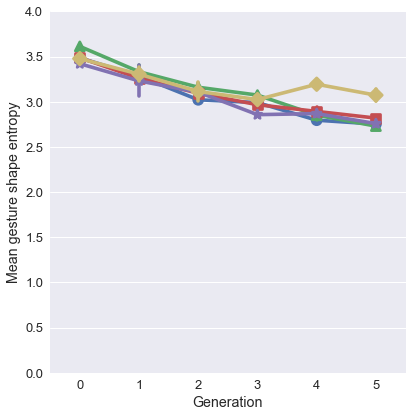

In [50]:
with sns.plotting_context({'lines.linewidth': 2}):
    ent_ex1 = sns.factorplot(x='generation', y='entropy', hue='chain', data=all_ent_ex1, 
                                    size = 6, aspect =1, legend = False,
                                    markers=['o','^','s', '*', 'D'])
    
    ent_ex1.set(ylim=(0,4), ylabel='Mean gesture shape entropy', xlabel = 'Generation')


Linear mixed effects model testing the effect of generation on gesture shape entropy.

N.B. we only get one value per participant, which is summed over gestures for all items. As such we do not include participant or target as random effects.

**Output variable:**
 * entropy

**Fixed effects:**
 * generation
 
**Random effects:**

 * chain (random intercept, random slope of generation)

In [51]:
%%R

ex1_ent = read.csv('../data_files/all_ent_ex1.csv')

In [52]:
%%R

ent_model_ex1 = lmer(entropy ~ generation +
                             (1 + generation|chain),
                             data=ex1_ent,
                             control=lmerControl(optimizer='bobyqa'))


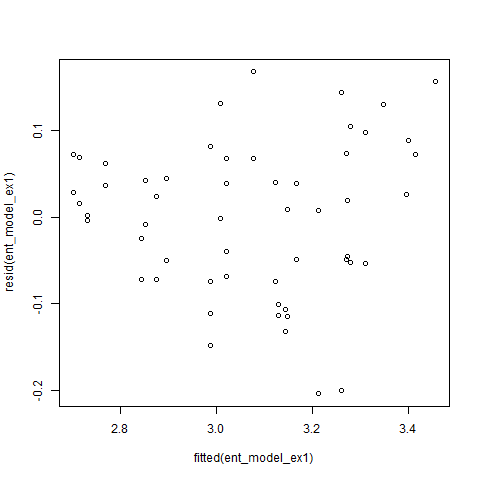

In [53]:
%R plot(fitted(ent_model_ex1), resid(ent_model_ex1))
# plot residuals

In [54]:
ent_ex1_model = %R capture.output(summary(ent_model_ex1))

print_output(ent_ex1_model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ generation + (1 + generation | chain)
   Data: ex1_ent
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: -81.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.19447 -0.65805  0.09662  0.72704  1.80936 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 chain    (Intercept) 0.002705 0.05201       
          generation  0.001202 0.03467  -0.81
 Residual             0.008664 0.09308       
Number of obs: 55, groups:  chain, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  3.40263    0.03400  4.00000 100.087 5.98e-08 ***
generation  -0.12333    0.01738  4.00000  -7.098  0.00208 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr)
generation -0.777


The model above demonstrates a significant effect of generation: entropy decreases over generations in experiment 1.

<a id='ent-ex2'></a>

### Experiment 2

Plot showing the mean entropy at each generation/round of each chain/pair for each condition in experiment 2.

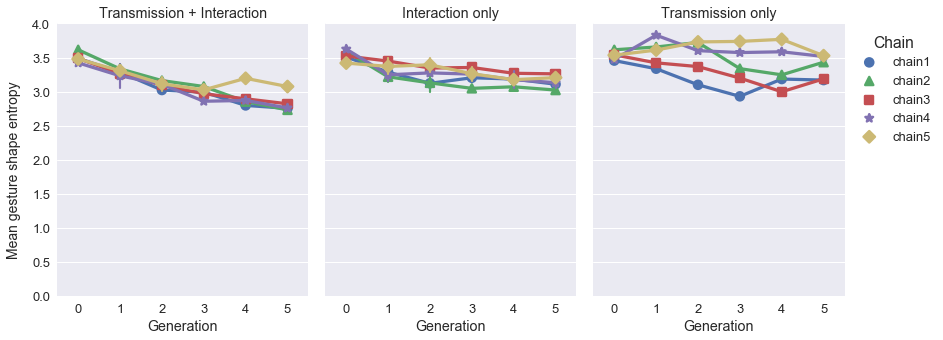

In [55]:
ent_ex2_plot = sns.factorplot(x='generation', y='entropy', hue='chain',
                                col='condition', data=all_ents_ex2, 
                                size = 5, aspect = 0.8, legend = False,
                                markers=['o','^','s', '*', 'D'], scale=1.5,
                                col_order = cols_order)

ent_ex2_plot.set(ylim=(0,4), ylabel='', xlabel = 'Generation')

plt.legend(title='Chain', bbox_to_anchor=(1,1), fontsize=13)

ent_ex2_plot.set_titles('{col_name}' )

plt.text(-14.5, 3, "Mean gesture shape entropy", rotation=90, fontsize=14)



These plots show the relationship between generation and gesture shape entropy. Entropy decreases over generations in the combined condition, to a lesser extent in the dyadic condition, and variably in the individual condition.

**Models**

Linear mixed effects model testing the effect of condition and generation on gesture shape entropy.

N.B. We do include participant as a random effect here, because participants in the interaction-only condition do allow us to obtain a repeated measure for each participant.

**Output variable:**
 * entropy

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**

 * chain (random intercept, random slope of generation)
 * participant (random intercept, participant nested within chains)

In [56]:
%%R 

all_ents_ex2 = read.csv('../data_files/all_ents_ex2.csv')
all_ents_ex2$condition = relevel(all_ents_ex2$condition, 'Transmission + Interaction')

In [57]:
%%R


# full model with interaction term
ent_model_ex2 = lmer(entropy ~ generation * condition +
                             (1 + generation|chain) +
                             (1|participant:chain),
                             data=all_ents_ex2,
                             control=lmerControl(optimizer='bobyqa'))


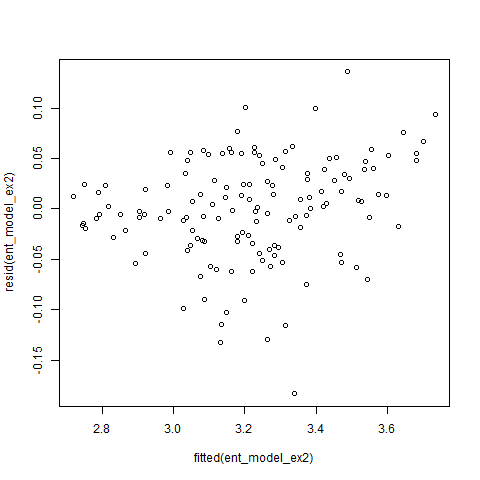

In [58]:
%R plot(fitted(ent_model_ex2), resid(ent_model_ex2))
# plot residuals

In [59]:
# print full model output

ent_ex2_output = %R capture.output(summary(ent_model_ex2))

print_output(ent_ex2_output)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ generation * condition + (1 + generation | chain) +  
    (1 | participant:chain)
   Data: all_ents_ex2
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: -152.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.49316 -0.40470  0.03365  0.48770  1.84947 

Random effects:
 Groups            Name        Variance  Std.Dev. Corr
 participant:chain (Intercept) 0.0153641 0.123952     
 chain             (Intercept) 0.0054836 0.074052     
                   generation  0.0000147 0.003833 1.00
 Residual                      0.0053993 0.073480     
Number of obs: 140, groups:  participant:chain, 90; chain, 5

Fixed effects:
                                       Estimate Std. Error        df t value
(Intercept)                             3.39617    0.04738   7.97000  71.681
generation                             -0.12157    0.01123  89.86000 -10.8

The model results support what we see in the plots: entropy reduces over generations in the combined condition. We also see an interaction between generation and condition for both the dyads and the individuals. Entropy in these other conditions does not reduce to the extent that it does in the combined condition.

<a id='ent-ex3'></a>

### Experiment 3

In [60]:
# create data frame of entropy for each condition

pieces = []

# for each condition
for con in ex3.condition.unique():
    
    # calculate entropy
    
    if con == 'ind':
        
        ents = entropy_all(ex3, con, reg)
        
        pieces.append(ents)
        
    else:
        
        ents = av_entropy_all(ex3, con, reg)
        
        pieces.append(ents)

# create df of all conditions
all_ents_ex3 = pd.concat(pieces, ignore_index=True)

In [61]:
all_ents_ex3.to_csv('../data_files/all_ents_ex3.csv', index=False)

Plot showing the mean entropy at each generation/round for each chain/pair for each condition of experiment 3.

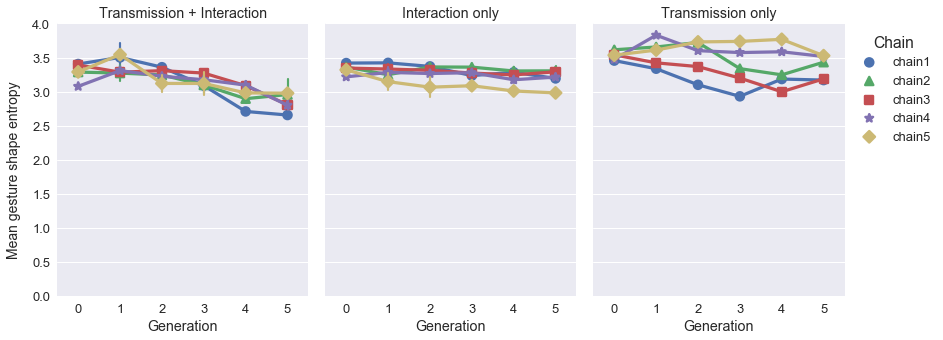

In [62]:
ent_ex3_plot = sns.factorplot(x='generation', y='entropy', hue='chain',
                                col='condition', data=all_ents_ex3, 
                                size = 5, aspect = 0.8, legend = False,
                                markers=['o','^','s', '*', 'D'], scale=1.5,
                                col_order = cols_order)

ent_ex3_plot.set(ylim=(0,4), ylabel='', xlabel = 'Generation')

plt.legend(title='Chain', bbox_to_anchor=(1,1), fontsize=13)

ent_ex3_plot.set_titles('{col_name}' )

plt.text(-14.5, 3, "Mean gesture shape entropy", rotation=90, fontsize=14)



**Models**

Linear mixed effects model testing the effect of condition and generation on gesture shape entropy.

Model structure is the same as in experiment 2.

**Output variable:**
 * entropy

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**

 * chain (random intercept, random slope of generation)
 * participant (random intercept, participant nested within chains)

In [63]:
%%R 

all_ents_ex3 = read.csv('../data_files/all_ents_ex3.csv')

all_ents_ex3$condition = relevel(all_ents_ex3$condition, 'Transmission + Interaction')

In [64]:
%%R


# full model with interaction term
ent_model_ex3 = lmer(entropy ~ generation * condition +
                             (1 + generation|chain) +
                             (1|participant:chain),
                             data=all_ents_ex3,
                             control=lmerControl(optimizer='bobyqa'))


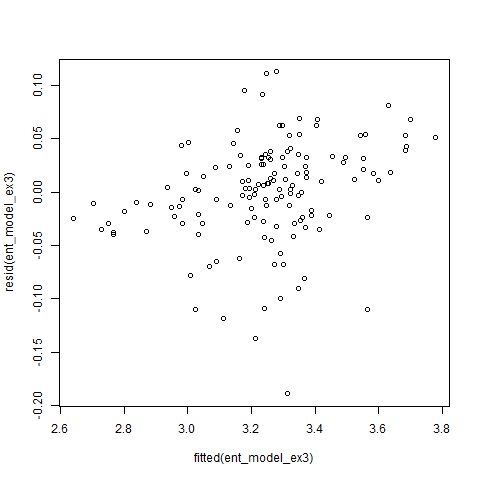

In [65]:
%R plot(fitted(ent_model_ex3), resid(ent_model_ex3))
# plot residuals

In [66]:
ent_ex3_model = %R capture.output(summary(ent_model_ex3))

print_output(ent_ex3_model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ generation * condition + (1 + generation | chain) +  
    (1 | participant:chain)
   Data: all_ents_ex3
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: -126.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.58803 -0.32922  0.04945  0.43902  1.54632 

Random effects:
 Groups            Name        Variance  Std.Dev.  Corr 
 participant:chain (Intercept) 2.341e-02 0.1529904      
 chain             (Intercept) 2.527e-07 0.0005027      
                   generation  3.194e-04 0.0178725 -1.00
 Residual                      5.321e-03 0.0729456      
Number of obs: 140, groups:  participant:chain, 90; chain, 5

Fixed effects:
                                       Estimate Std. Error        df t value
(Intercept)                             3.40625    0.03828 122.59000  88.987
generation                             -0.10461    0.01500  18.7

As above, we see that there is a significant effect of generation: entropy decreases over generations in the combined condition. There is a significant interaction between generation and condition for dyads and individuals - entropy does not decrease over generations as it does in the combined condition.